<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Age         177
Cabin       687
Embarked      2
dtype: int64

<ipython-input-1-f4e929a5b8ec>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-f4e929a5b8ec>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

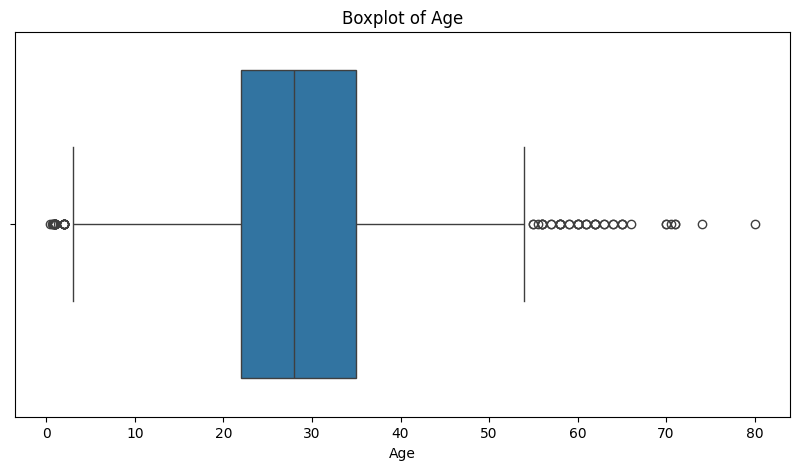

<ipython-input-1-f4e929a5b8ec>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])


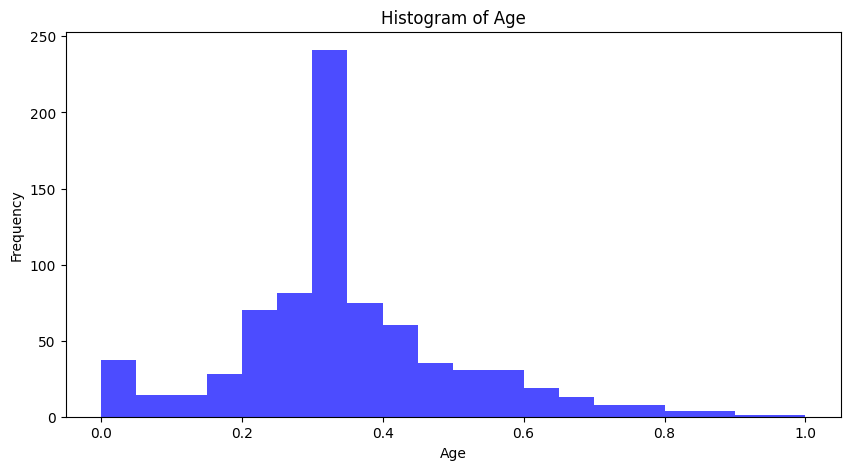

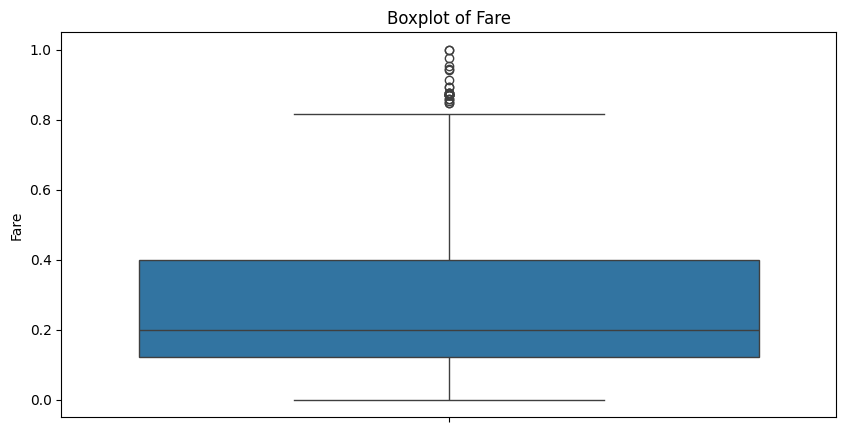

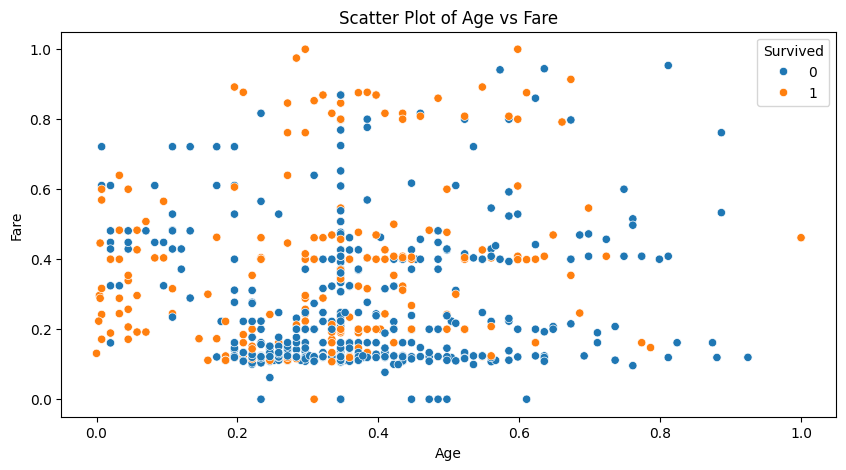

Data preprocessing completed!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# 1. Đọc dữ liệu
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Hiển thị thông tin cơ bản về dữ liệu
display(df.info())
display(df.describe())

# 2. Kiểm tra dữ liệu thiếu
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# 3. Xử lý dữ liệu thiếu
## Điền giá trị trung bình cho Age
df['Age'].fillna(df['Age'].median(), inplace=True)
## Điền 'Unknown' cho Cabin
df['Cabin'].fillna('Unknown', inplace=True)
## Điền giá trị phổ biến nhất cho Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Kiểm tra lại dữ liệu thiếu
display(df.isnull().sum())

# 4. Xử lý ngoại lệ bằng Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

# Sử dụng IQR để loại bỏ ngoại lệ
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# 5. Chuyển đổi kiểu dữ liệu
## Chuyển đổi object -> datetime
## (Titanic dataset không có cột datetime nên bỏ qua bước này)

# Chuyển đổi categorical -> numerical
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 6. Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# 7. Trực quan hóa dữ liệu
plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot Fare
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

# Scatter plot giữa Fare và Age
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])
plt.title("Scatter Plot of Age vs Fare")
plt.show()

# Lưu file Jupyter Notebook
print("Data preprocessing completed!")

